In [44]:
import numpy as np
import matplotlib.pyplot as plt

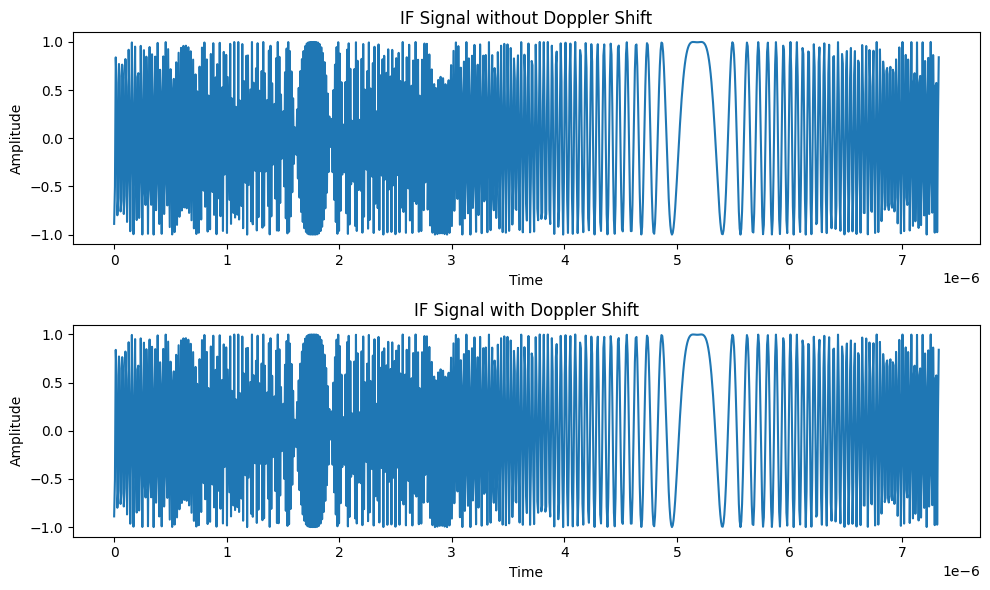

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Nd = 128  # Number of chirps
Nr = 1024  # Number of ADC sampling points
fc = 77e9  # Carrier frequency
B = 1.5e8  # Bandwidth
TChirp = 7.333333333333333e-06  # Time of chirp
c = 3e8  # Speed of light

# Target distance and velocity (for Doppler shift)
r0 = 100  # Target distance in meters
velocity = 0  # Velocity of the target in m/s

# Calculate the chirp slope
slope = B / TChirp  # Chirp slope

# Calculate time delay
td = 2 * r0 / c  # Time delay

# Generate the time array for the signal
t = np.linspace(0, Nd * TChirp, Nr * Nd)

# Calculate Doppler frequency shift and intermediate frequency (IF) signal due to motion
freqIF = slope * td
IF_angle_freq = fc * t + (slope * t * t) / 2 - ((fc * (t - td) + (slope * (t - td) * (t - td)) / 2))
IFx = np.cos(-(2 * np.pi * (fc * (t - td) + (slope * (t - td) * (t - td)) / 2)) + (2 * np.pi * IF_angle_freq))

# Incorporate Doppler effect due to target velocity
doppler_shift = 2 * (fc * velocity) / c
IFx_doppler = np.cos(-(2 * np.pi * (fc * (t - td) + (slope * (t - td) * (t - td)) / 2)) + (2 * np.pi * IF_angle_freq) + doppler_shift)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t[:1024], IFx[:1024])
plt.title('IF Signal without Doppler Shift')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t[:1024], IFx_doppler[:1024])
plt.title('IF Signal with Doppler Shift')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [46]:
t = np.linspace(0,Nd*Tchirp,Nr*Nd) #Time of Tx and Rx
angle_freq = fc*t+(slope*t*t)/2 #Tx signal angle speed
freq = fc + slope*t #Tx frequency
Tx = np.cos(2*np.pi*angle_freq) #Waveform of Tx

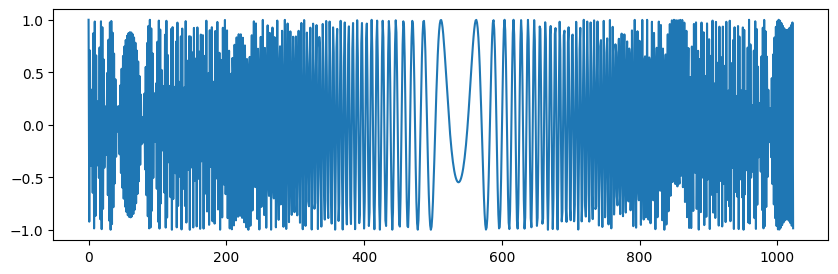

In [47]:
plt.figure(figsize=(10,3))
plt.plot(Tx[0:1024])
plt.show()

In [48]:
td = 2*r0/c
freqRx = fc + slope*(t)
Rx = np.cos(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2))

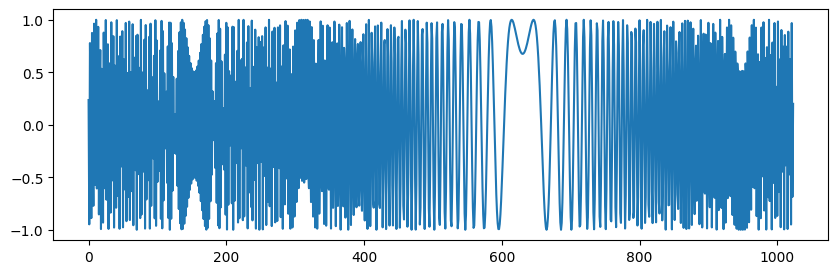

In [49]:
plt.figure(figsize=(10,3))
plt.plot(Rx[0:1024])
plt.show()

In [50]:
IF_angle_freq = fc*t+(slope*t*t)/2 - ((fc*(t-td) + (slope*(t-td)*(t-td))/2))
freqIF = slope*td
IFx = np.cos(-(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2))+(2*np.pi*angle_freq))

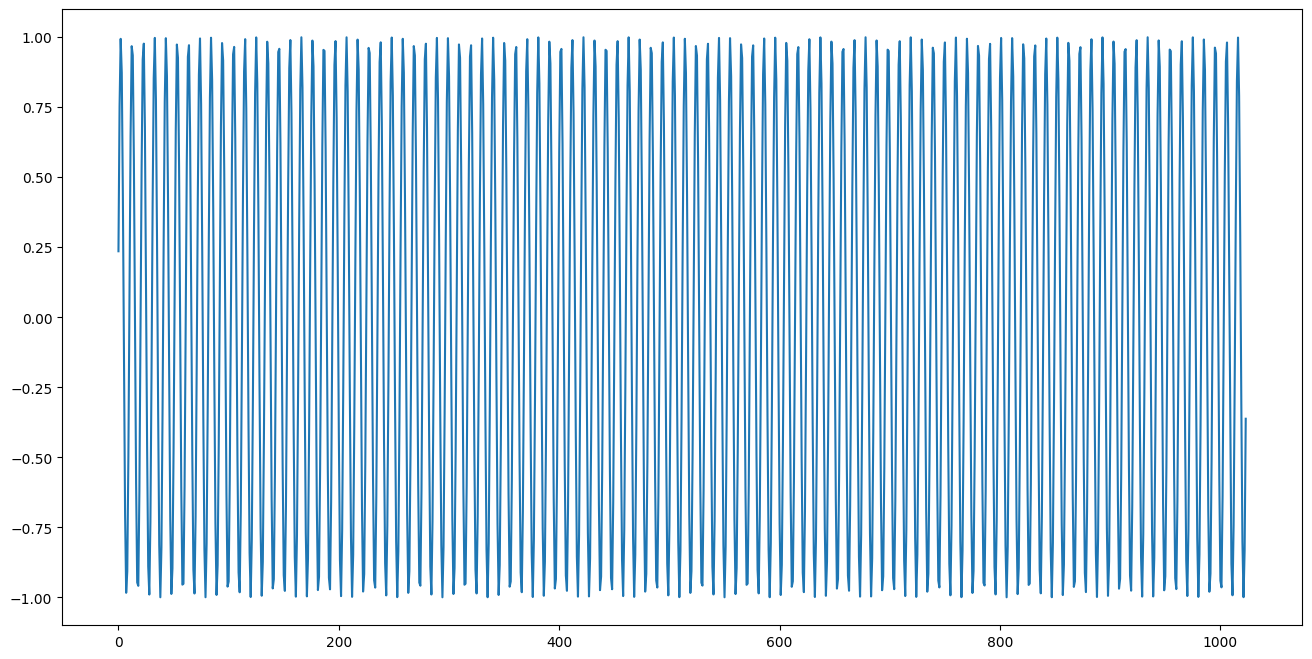

In [51]:
plt.figure(figsize=(16,8))
plt.plot(IFx[0:1024])
plt.show()

In [52]:
IF_angle_freq = fc*t+(slope*t*t)/2 - ((fc*(t-td) + (slope*(t-td)*(t-td))/2))
freqIF = slope*td
IFx = np.cos(-(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2))+(2*np.pi*angle_freq))

Text(0.5, 1.0, 'IF Signal FFT')

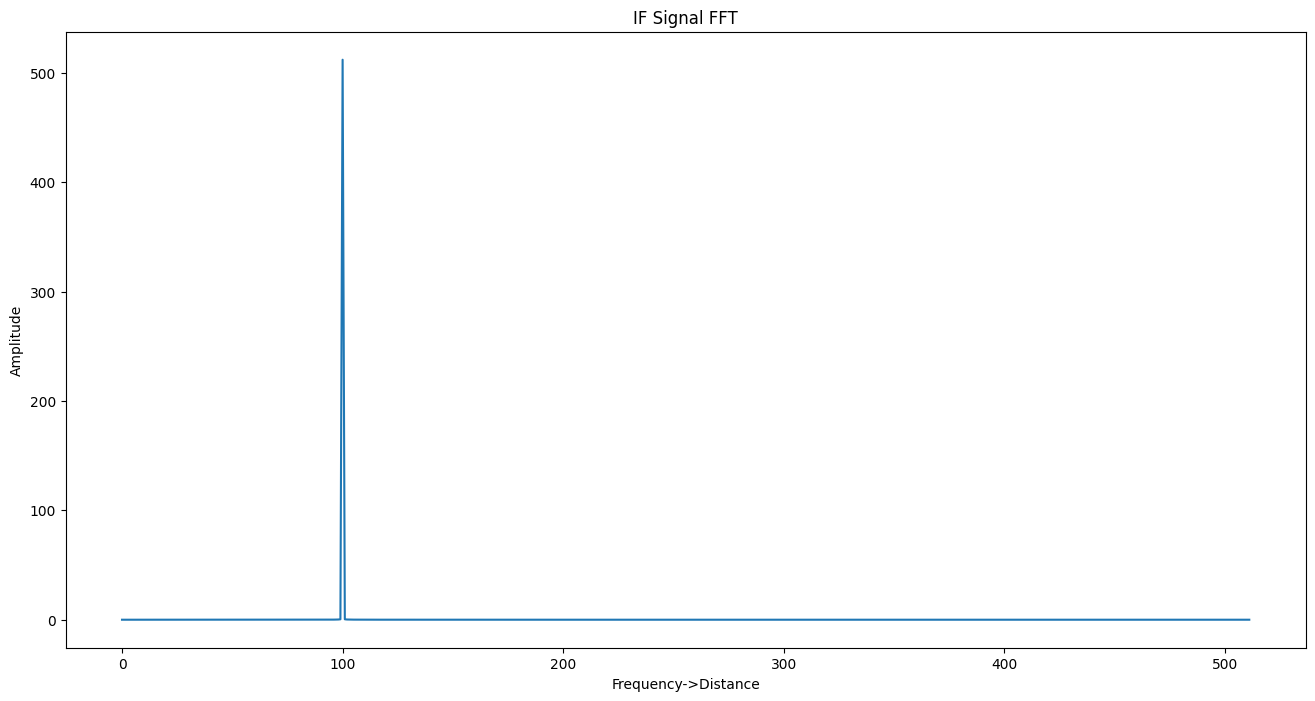

In [60]:
# doppler = 10*np.log10(np.abs(np.fft.fft(IFx[0:1024])))
doppler=np.abs(np.fft.fft(IFx[0:1024]))
frequency = np.fft.fftfreq(1024, 1/Fs)
range = frequency*c/(2*slope)
plt.figure(figsize=(16,8))
plt.plot(range[0:512],doppler[0:512])
plt.xlabel('Frequency->Distance')
plt.ylabel('Amplitude')
plt.title('IF Signal FFT')


Text(0.5, 1.0, 'Spectogram')

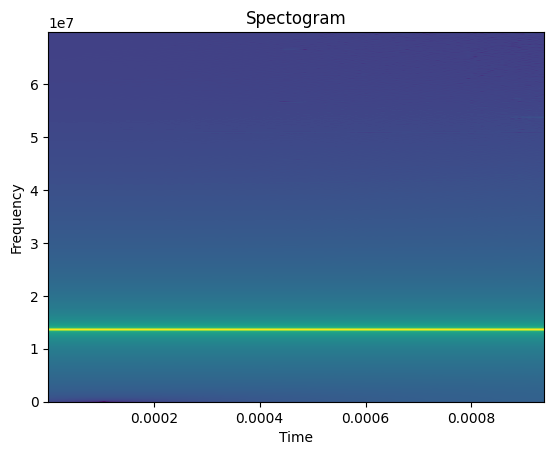

In [62]:
plt.specgram(IFx,1024,Fs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram')

In [55]:
print("Number of chirp",Nd)
print("Number of sampling each chiro",Nr)
print(np.array(IFx).shape)

Number of chirp 128
Number of sampling each chiro 1024
(131072,)


In [56]:
IFReshaped =np.array(IFx).reshape(Nd,Nr)

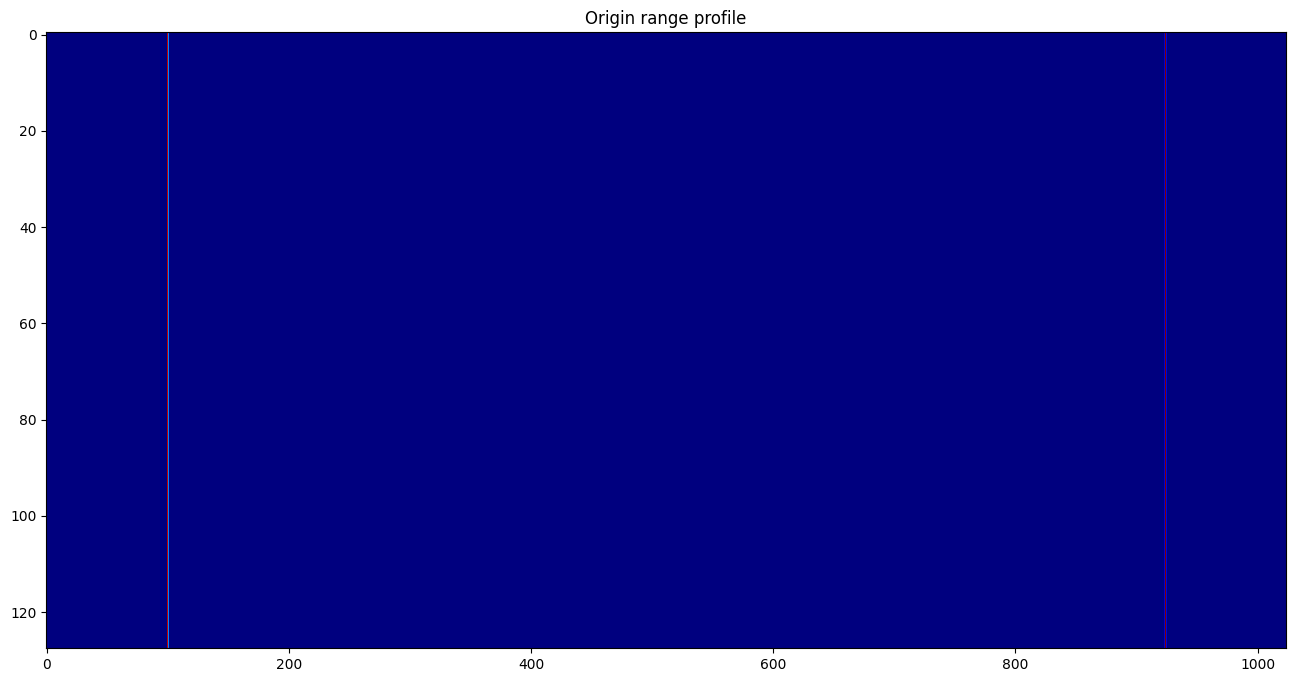

In [57]:
rangeProfiles =[np.fft.fft (IFSignal) for IFSignal in  IFReshaped]
magnitude_range_profile = [np.abs(profile) for profile in rangeProfiles]
plt.figure(figsize=(16,8))
plt.imshow(magnitude_range_profile,aspect='auto',cmap='jet')
plt.title("Origin range profile")
plt.show()